MSE: 80658456.40
Learned parameters: slope=295.40, intercept=52150.96


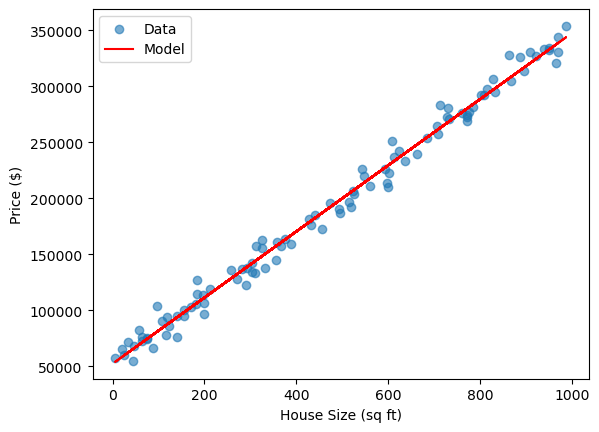

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 1) * 1000  # House sizes (sq ft)
y = 300 * X + 50000 + np.random.randn(100, 1) * 10000  # Prices

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate performance (MSE)
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse:.2f}")
print(f"Learned parameters: slope={model.coef_[0][0]:.2f}, intercept={model.intercept_[0]:.2f}")

# Visualize
plt.scatter(X, y, alpha=0.6, label='Data')
plt.plot(X, y_pred, 'r-', label='Model')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [6]:
# Rule-based spam filter (traditional)
def is_spam_traditional(email):
    spam_words = ['viagra', 'lottery', 'winner', 'click here']
    for word in spam_words:
        if word.lower() in email.lower():
            return True
    return False


# ml approach
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# ML-based spam filter
emails = ["Win lottery now!", "Meeting at 3pm", "Viagra sale", "Project update"]
labels = [1, 0, 1, 0]  # 1=spam, 0=not spam

# Convert text to features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Train model
model = MultinomialNB()
model.fit(X, labels)

# Test
test_email = ["Click here to win"]
test_features = vectorizer.transform(test_email)
prediction = model.predict(test_features)
print(f"Spam prediction: {'Spam' if prediction[0] else 'Not Spam'}")

Spam prediction: Spam


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate multivariate data
n_samples = 1000
n_features = 3
X = np.random.randn(n_samples, n_features)
true_weights = np.array([2.5, -1.3, 0.7])
y = X @ true_weights + 0.5 + np.random.randn(n_samples) * 0.1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"True weights: {true_weights}")
print(f"Learned weights: {model.coef_}")
print(f"R² score: {r2:.5f}")

True weights: [ 2.5 -1.3  0.7]
Learned weights: [ 2.49640292 -1.3017386   0.70309686]
R² score: 0.99872


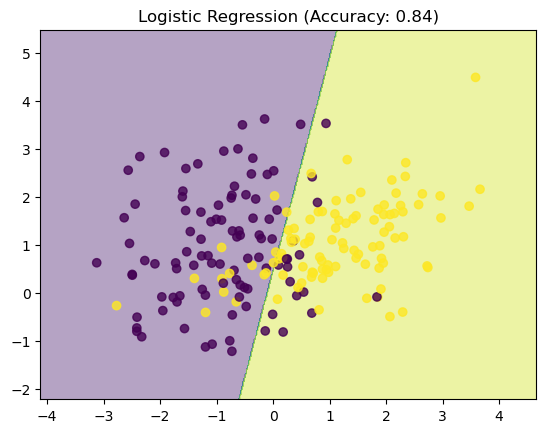

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Generate classification data
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, random_state=42)

# Train classifier
clf = LogisticRegression()
clf.fit(X, y)

# Predictions
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)

# Visualize decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.title(f'Logistic Regression (Accuracy: {accuracy:.2f})')
plt.show()

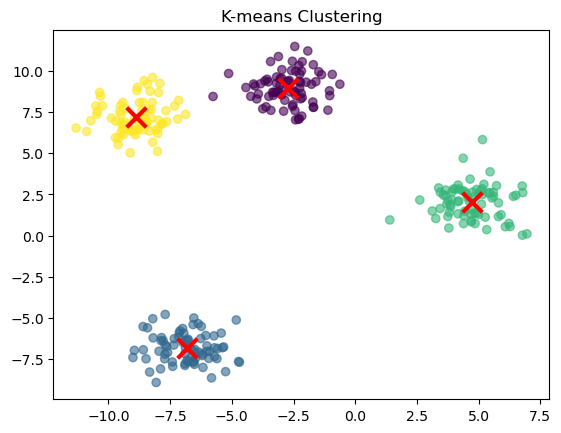

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate clustered data
X, true_labels = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

# Apply K-means
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='x', s=200, c='red', linewidth=3)
plt.title('K-means Clustering')
plt.show()

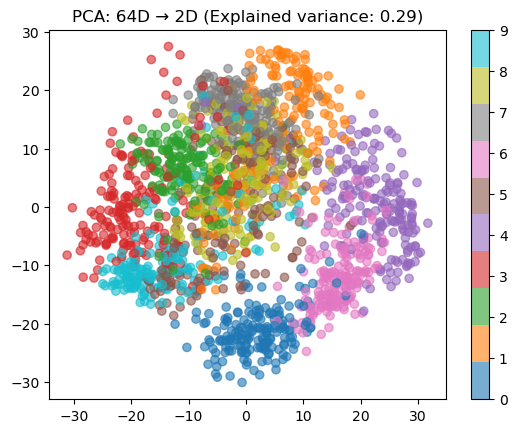

Original dimensions: (1797, 64)
Reduced dimensions: (1797, 2)
Variance explained by each component: [0.14890594 0.13618771]


In [10]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load high-dimensional data
digits = load_digits()
X = digits.data  # 64-dimensional

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Visualize
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.target, cmap='tab10', alpha=0.6)
plt.colorbar()
plt.title(f'PCA: 64D → 2D (Explained variance: {sum(pca.explained_variance_ratio_):.2f})')
plt.show()

print(f"Original dimensions: {X.shape}")
print(f"Reduced dimensions: {X_reduced.shape}")
print(f"Variance explained by each component: {pca.explained_variance_ratio_}")

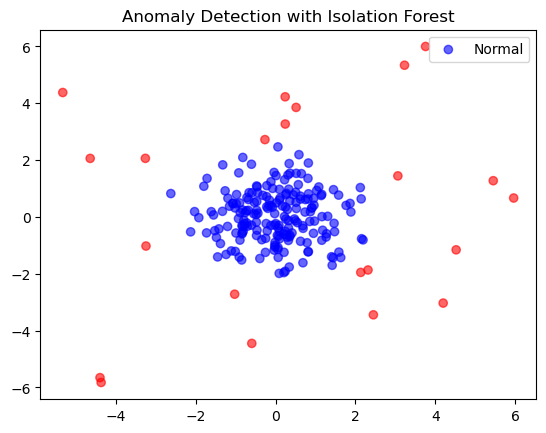

In [8]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# Generate normal data with outliers
np.random.seed(42)
X_normal = np.random.randn(200, 2)
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X_normal, X_outliers])

# Anomaly detection
clf = IsolationForest(contamination=0.1, random_state=42)
y_pred = clf.fit_predict(X)

# Visualize
colors = ['blue' if y == 1 else 'red' for y in y_pred]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6)
plt.title('Anomaly Detection with Isolation Forest')
plt.legend(['Normal', 'Anomaly'])
plt.show()

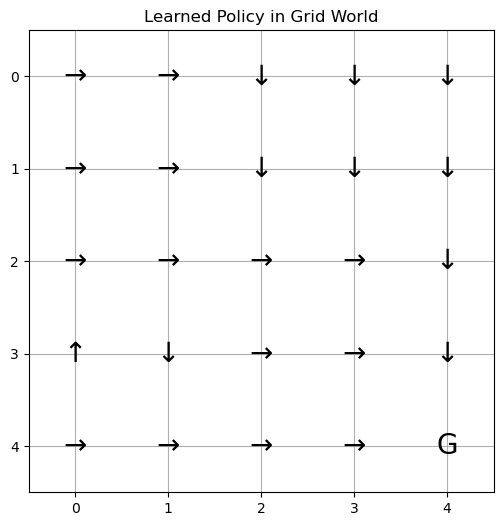

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Grid World Example
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.state = [0, 0]  # Start position
        self.goal = [size-1, size-1]  # Goal position
        
    def reset(self):
        self.state = [0, 0]
        return self.state
    
    def step(self, action):
        # Actions: 0=up, 1=right, 2=down, 3=left
        moves = [[-1, 0], [0, 1], [1, 0], [0, -1]]
        new_state = [self.state[0] + moves[action][0], 
                     self.state[1] + moves[action][1]]
        
        # Check boundaries
        if 0 <= new_state[0] < self.size and 0 <= new_state[1] < self.size:
            self.state = new_state
        
        # Calculate reward
        if self.state == self.goal:
            reward = 10
            done = True
        else:
            reward = -1
            done = False
            
        return self.state, reward, done

# Simple Q-learning implementation
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    q_table = np.zeros((env.size, env.size, 4))
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        
        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = np.random.randint(4)
            else:
                action = np.argmax(q_table[state[0], state[1], :])
            
            # Take action
            next_state, reward, done = env.step(action)
            
            # Q-learning update
            old_q = q_table[state[0], state[1], action]
            next_max_q = np.max(q_table[next_state[0], next_state[1], :])
            new_q = old_q + alpha * (reward + gamma * next_max_q - old_q)
            q_table[state[0], state[1], action] = new_q
            
            state = next_state
    
    return q_table

# Train agent
env = GridWorld(size=5)
q_table = q_learning(env, episodes=1000)

# Visualize learned policy
policy = np.argmax(q_table, axis=2)
arrows = ['↑', '→', '↓', '←']

plt.figure(figsize=(6, 6))
for i in range(env.size):
    for j in range(env.size):
        if [i, j] == env.goal:
            plt.text(j, i, 'G', ha='center', va='center', fontsize=20)
        else:
            plt.text(j, i, arrows[policy[i, j]], ha='center', va='center', fontsize=20)
plt.xlim(-0.5, env.size-0.5)
plt.ylim(-0.5, env.size-0.5)
plt.gca().invert_yaxis()
plt.grid(True)
plt.title('Learned Policy in Grid World')
plt.show()

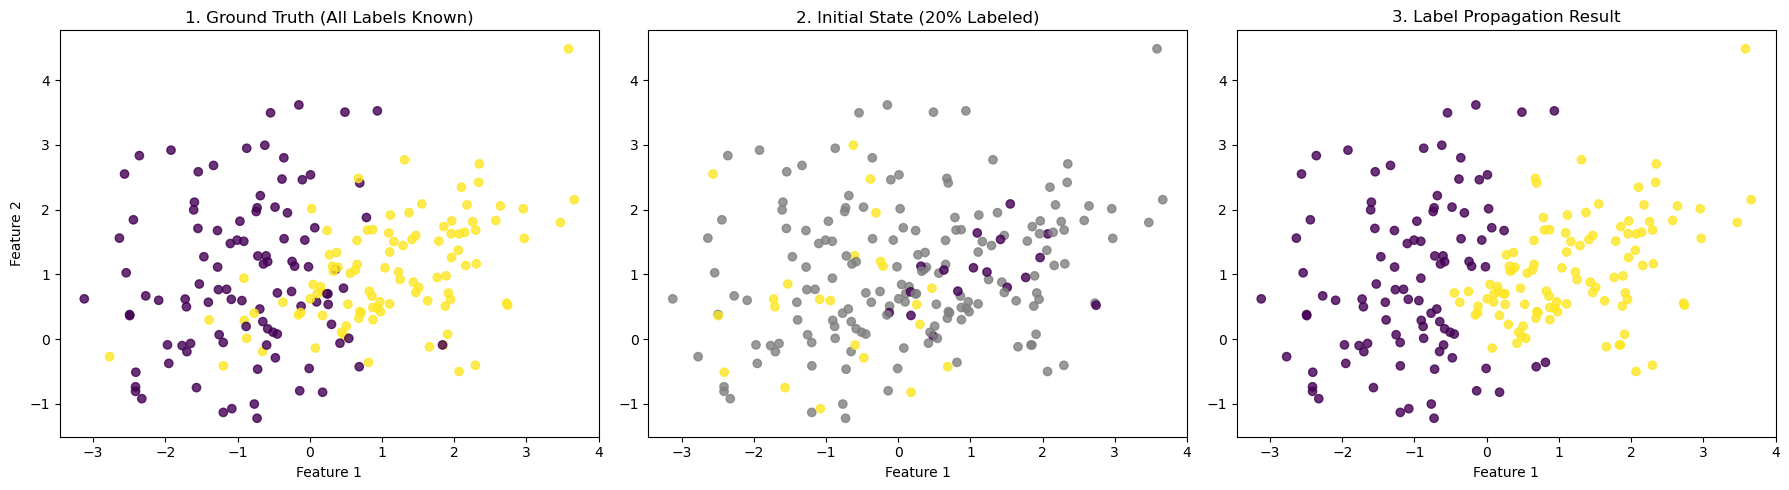

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelPropagation
from sklearn.datasets import make_classification

# --- 1. Generate Data ---
# Create a dataset with two distinct clusters
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# --- 2. Create the Semi-Supervised Scenario ---
# Deliberately "forget" most of the labels to simulate a real-world problem
# where labeling data is expensive.
rng = np.random.RandomState(42)
# Randomly select 40 data points to keep their labels (20% of the data)
labeled_indices = rng.choice(len(y), size=40, replace=False)
y_semi = np.copy(y)
# Set the label to -1 for all points that are NOT in our `labeled_indices` list
# In scikit-learn, -1 is the standard convention for an unlabeled point.
y_semi[~np.isin(range(len(y)), labeled_indices)] = -1

# --- 3. Apply the Label Propagation Algorithm ---
# Create an instance of the model
label_prop_model = LabelPropagation()
# Train the model: it will learn from the few known labels and the structure of all the data
label_prop_model.fit(X, y_semi)
# Get the final predictions for all points
y_pred = label_prop_model.predict(X)


# --- 4. Visualize All Three Stages ---
# Create a figure with 3 side-by-side subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: The Ground Truth (what a fully supervised model would see)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.8)
ax1.set_title('1. Ground Truth (All Labels Known)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')


# Plot 2: The Initial State (what the algorithm starts with)
# We create a list of colors: blue for class 1, red for class 0, and gray for unlabeled
initial_colors = ['#440154' if l == 1 else '#fde725' if l == 0 else 'gray' for l in y_semi]
ax2.scatter(X[:, 0], X[:, 1], c=initial_colors, alpha=0.8)
ax2.set_title('2. Initial State (20% Labeled)')
ax2.set_xlabel('Feature 1')


# Plot 3: The Final Result (the algorithm's predictions)
ax3.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.8)
ax3.set_title('3. Label Propagation Result')
ax3.set_xlabel('Feature 1')

# Display the plots
plt.tight_layout()
plt.show()

In [27]:
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Example: Image rotation prediction as self-supervised task
def create_rotation_dataset(images, batch_size=32):
    """Create self-supervised dataset by rotating images"""
    rotations = [0, 90, 180, 270]
    X_rotated = []
    y_rotation = []
    
    for img in images:
        rotation_idx = np.random.randint(4)
        angle = rotations[rotation_idx]
        
        # Rotate image (simplified for demonstration)
        rotated_img = np.rot90(img, k=rotation_idx)
        
        X_rotated.append(rotated_img)
        y_rotation.append(rotation_idx)
    
    return np.array(X_rotated), np.array(y_rotation)

# Build self-supervised model
def build_rotation_model(input_shape):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(4, activation='softmax')  # 4 rotation classes
    ])
    return model

# Demonstration with synthetic data
synthetic_images = np.random.rand(100, 28, 28, 1)
X_rot, y_rot = create_rotation_dataset(synthetic_images)

print(f"Self-supervised task: Predict rotation angle")
print(f"Input shape: {X_rot.shape}")
print(f"Labels shape: {y_rot.shape}")

Self-supervised task: Predict rotation angle
Input shape: (100, 28, 28, 1)
Labels shape: (100,)
